In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('dataset_cleaned.csv')
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Visualizing Correlation through Heat Map

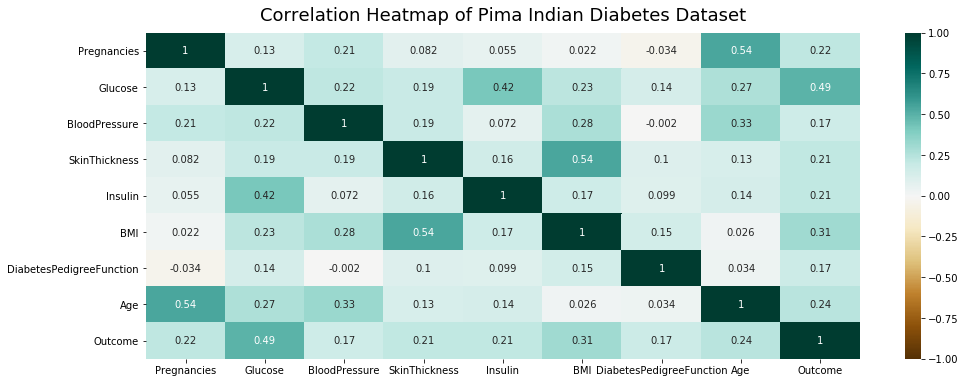

In [3]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr().round(3),vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap of Pima Indian Diabetes Dataset', fontdict={'fontsize':18}, pad=12);

In [4]:
#High correlation can be seen in these pair of variables: (Insulin, Glucose), (Outcome, Glucose), (Age, Pregnancies), (BMI, Skin Thickness)

# Making Box Plots to Compare the Features between Diabetics and Non-Diabetics:

Text(0.5, 1.0, 'Variation in Blood Pressure among Diabetics and Non-Diabetics.')

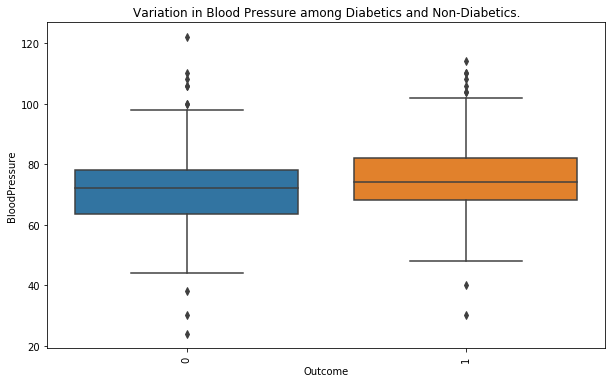

In [5]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='BloodPressure', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Blood Pressure among Diabetics and Non-Diabetics.')


In [6]:
#This plot shows that the Diabetics seem to have a higher blood pressure than non- diabetics.

Text(0.5, 1.0, 'Variation in BMI among Diabetics and Non-Diabetics.')

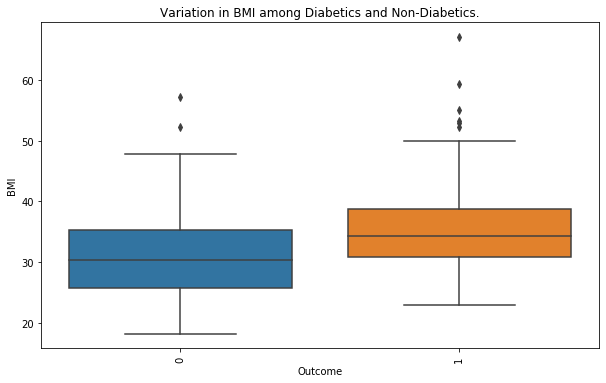

In [7]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='BMI', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in BMI among Diabetics and Non-Diabetics.')


In [8]:
#Diabetics seem to have a highter BMI than non-diabetics as the average value of BMI for outcome 1 is higher than outcome 0

Text(0.5, 1.0, 'Variation in Age among Diabetics and Non-Diabetics.')

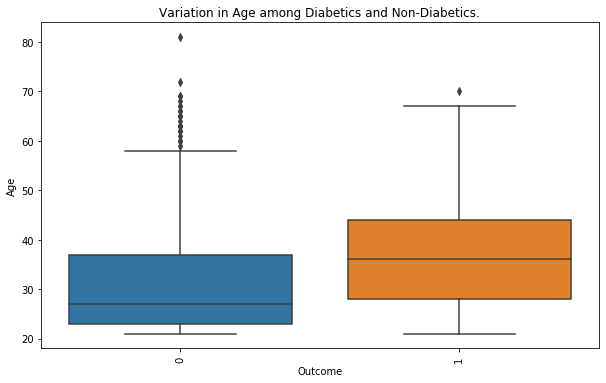

In [9]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='Age', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Age among Diabetics and Non-Diabetics.')


In [10]:
#There is large difference between the mean Age of Diabetics and non-diabetics which can imply that people get diabetes at an older age. Although, we are not sure yet.

Text(0.5, 1.0, 'Variation in Glucose among Diabetics and Non-Diabetics.')

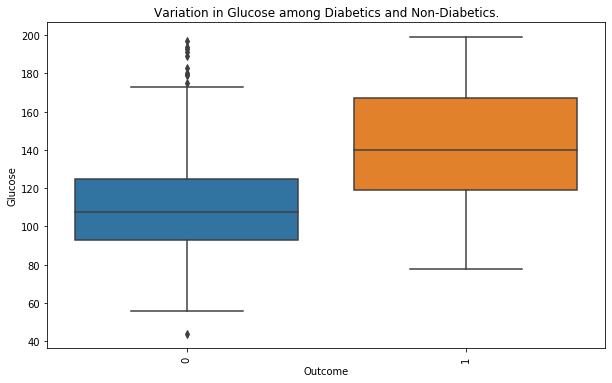

In [11]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='Glucose', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Glucose among Diabetics and Non-Diabetics.')


In [12]:
#Diabetics seem to have a higher Glucose level than non-Diabetics which is expected. This can help us in building our model.

Text(0.5, 1.0, 'Variation in Insulin among Diabetics and Non-Diabetics.')

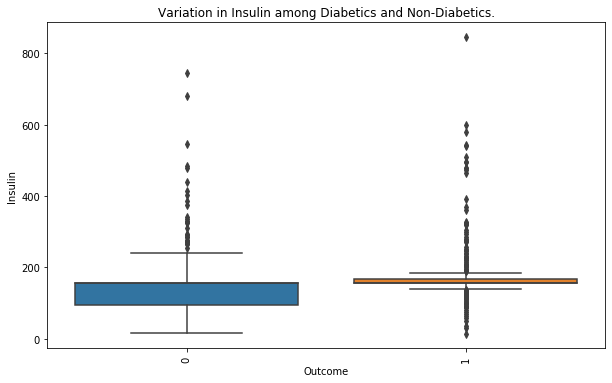

In [13]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='Insulin', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Insulin among Diabetics and Non-Diabetics.')


Text(0.5, 1.0, 'Variation in Insulin among Diabetics and Non-Diabetics.')

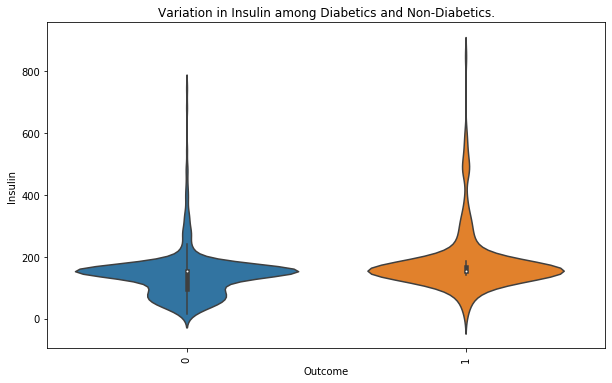

In [14]:
plt.figure(figsize=(10,6))
plot = sns.violinplot(x='Outcome',y='Insulin', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Insulin among Diabetics and Non-Diabetics.')

In [15]:
#The insulin level for diabetics seems to be a little higher than non-diabetics

Text(0.5, 1.0, 'Variation in Pregnancies among Diabetics and Non-Diabetics.')

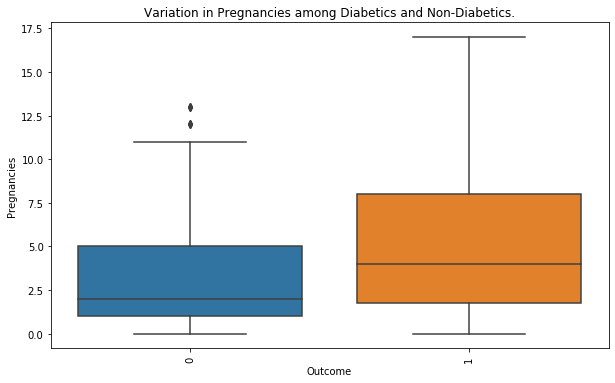

In [16]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='Pregnancies', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Pregnancies among Diabetics and Non-Diabetics.')

In [17]:
#This plot suggests that the Diabetic women have higher pregnancies than the non-Diabetic women.

Text(0.5, 1.0, 'Variation in Skin Thickness among Diabetics and Non-Diabetics.')

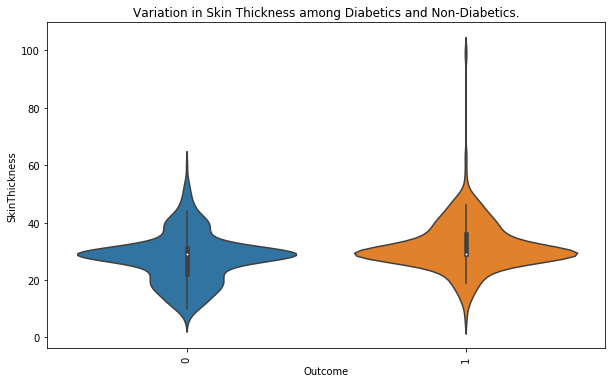

In [18]:
plt.figure(figsize=(10,6))
plot = sns.violinplot(x='Outcome',y='SkinThickness', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Skin Thickness among Diabetics and Non-Diabetics.')

In [19]:
#The average skin thickness for both outcomes do not seem to differ much. 

Text(0.5, 1.0, 'Variation in Diabetes Pedigree Function among Diabetics and Non-Diabetics.')

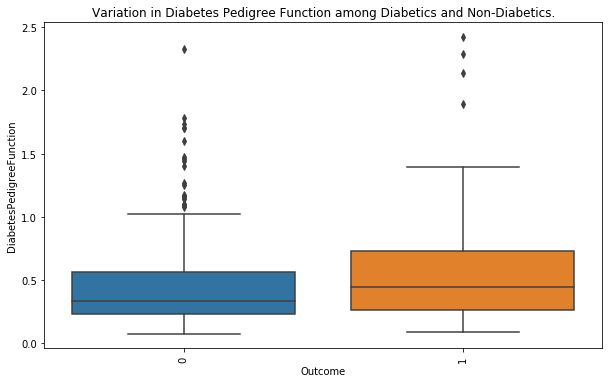

In [20]:
plt.figure(figsize=(10,6))
plot = sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction', data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.title('Variation in Diabetes Pedigree Function among Diabetics and Non-Diabetics.')

In [21]:
#Diabetics seem to have a higher pedigree function as compared to non-diabetics

# Count of Diabetics and non-Diabetics:

Text(0.5, 1.0, 'Count of Diabetics vs Non-Diabetics')

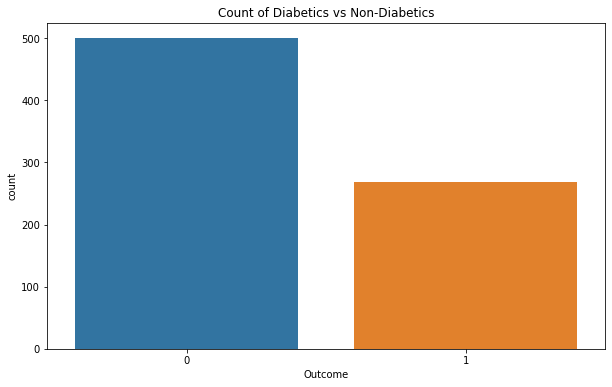

In [22]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x="Outcome", data=df)
plt.title('Count of Diabetics vs Non-Diabetics')

In [23]:
#In our dataset non-Diabetics seem to be higher in number than the Diabetics. Thus, our dataset is imbalanced in which outcome 0 is the dominant class.

# Statistical Analysis (A/B Testing): 

In order to find association between different features and diabetes, we will perform A/B Testing. In the boxplots we observed that the Diabetics had greater mean values for majority of the features than non-Diabetics. So, we will choose the following Null and Alternative Hypothesis:

**Null Hypothesis:** In the population, the different values of features for people with Diabetes come from the same underlying distribution as those who are non- Diabetics.

**Alternative Hypothesis:** In the population, the Diabetics have higher values on average than the Non-Diabetics.

The test statistic selected is the difference between the average values of features for Diabetics and Non-Diabetics. Initially, the observed statistic is calculated for the given data. Then, hypothesis testing is performed and 1000 test statistic values are simulated under the Null Hypothesis. If the calculated p-value is less than 0.05, we will reject the Null Hypothesis and accept the Alternative Hypothesis.

# 1- Pregancies And Diabetes:

In [139]:
def test_statistic(tbl):
    x_diab = np.mean(tbl.query("Outcome==1").iloc[:,0])
    x_nodiab = np.mean(tbl.query("Outcome==0").iloc[:,0])
    return x_nodiab-x_diab

In [107]:
preg_observed_statistic = test_statistic(df.loc[:,["Pregnancies","Outcome"]])
preg_observed_statistic

-1.567671641791045

In [108]:
def simulate_null(tbl):
    tbl["Shuffled"] = tbl.iloc[:,0].sample(frac=1,replace=False).reset_index(drop=True)
    x_diab = np.mean(tbl.query("Outcome==1").loc[:,"Shuffled"])
    x_nodiab = np.mean(tbl.query("Outcome==0").loc[:,"Shuffled"])
    return x_nodiab-x_diab


# Run your function once to make sure that it works.


In [97]:
def create_simulated_stats(tbl):
    simulated_stats = np.array([])

    for i in np.arange(1000):
        x = simulate_null(tbl)
        simulated_stats = np.append(simulated_stats,x)
    return simulated_stats

In [109]:
preg_simulated_stats = create_simulated_stats(df.loc[:,["Pregnancies","Outcome"]])


Text(0.5, 1.0, 'Distribution of Pregnancy Differences')

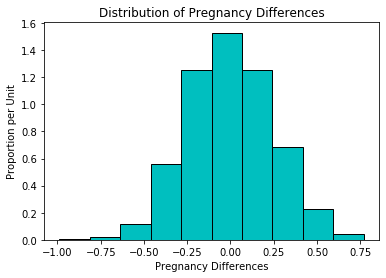

In [99]:
result = plt.hist(preg_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Pregnancy Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Pregnancy Differences")

In [110]:
preg_p_value = np.count_nonzero(preg_simulated_stats <= preg_observed_statistic)/1000
preg_p_value

0.0

P-Value is less than 0.05, so we will reject the Null Hypothesis. This means that the Diabetics have higher pregnancies on average than non-Diabetics. 

# 2- Glucose And Diabetes:

In [86]:
gluc_observed_statistic = test_statistic(df.loc[:,["Glucose","Outcome"]])
gluc_observed_statistic

-31.454447761194032

In [79]:
gluc_simulated_stats = create_simulated_stats(df.loc[:,["Glucose","Outcome"]])


Text(0.5, 1.0, 'Distribution of Glucose Differences')

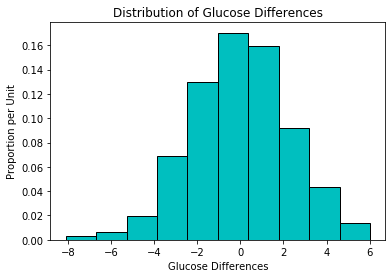

In [81]:
result = plt.hist(gluc_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Glucose Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Glucose Differences")

In [91]:
gluc_p_value = np.count_nonzero(gluc_simulated_stats <= gluc_observed_statistic)/1000
gluc_p_value

0.0

P-Value less than 0.05 is statistically significant. Null Hypothesis is rejected and Alternative Hypothesis is accepted. A strong association is observed between Glucose and Diabetes.

# 3- Blood Pressure and Diabetes: 

In [87]:
bp_observed_statistic = test_statistic(df.loc[:,["BloodPressure","Outcome"]])
bp_observed_statistic

-4.203134328358203

In [89]:
bp_simulated_stats = create_simulated_stats(df.loc[:,["BloodPressure","Outcome"]])


Text(0.5, 1.0, 'Distribution of Blood Pressure Differences')

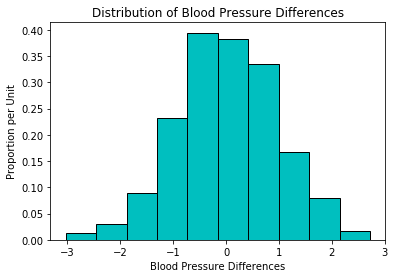

In [90]:
result = plt.hist(bp_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Blood Pressure Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Blood Pressure Differences")

In [93]:
bp_p_value = np.count_nonzero(bp_simulated_stats <= bp_observed_statistic)/1000
bp_p_value

0.0

As P-Value is less than 0.05 for Blood Pressure too, so we will accept the Alternative Hypothesis implying Diabetics have higher blood pressure than Non-Diabetics.

# 4- Skin Thickness and Diabetes

In [111]:
skinT_observed_statistic = test_statistic(df.loc[:,["SkinThickness","Outcome"]])
skinT_observed_statistic

-3.960567164179107

In [112]:
skinT_simulated_stats = create_simulated_stats(df.loc[:,["SkinThickness","Outcome"]])

Text(0.5, 1.0, 'Distribution of Skin Thickness Differences')

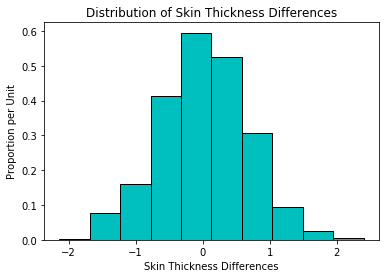

In [113]:
result = plt.hist(skinT_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Skin Thickness Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Skin Thickness Differences")

In [114]:
skinT_p_value = np.count_nonzero(skinT_simulated_stats <= skinT_observed_statistic)/1000
skinT_p_value

0.0

Null Hypothesis is rejected and Alternative Hypothesis is accepted. Diabetics have higher skin thickness on average than non-Diabetics.

# 5- Insulin and Diabetes: 

In [144]:
insulin_observed_statistic = test_statistic(df.loc[:,["Insulin","Outcome"]])
insulin_observed_statistic

-38.197253731343295

In [145]:
insulin_simulated_stats = create_simulated_stats(df.loc[:,["Insulin","Outcome"]])

Text(0.5, 1.0, 'Distribution of Insulin Level Differences')

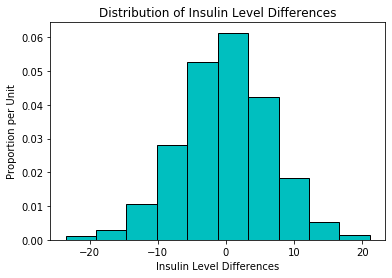

In [146]:
result = plt.hist(insulin_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Insulin Level Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Insulin Level Differences")

In [147]:
insulin_p_value = np.count_nonzero(insulin_simulated_stats <= insulin_observed_statistic)/1000
insulin_p_value

0.0

As P-Value is less than 0.05 for Insulin Level, so we will accept the Alternative Hypothesis which states that Diabetics have higher Insulin Levels, on average, than Non-Diabetics.

# 6- BMI and Diabetes:

In [148]:
BMI_observed_statistic = test_statistic(df.loc[:,["BMI","Outcome"]])
BMI_observed_statistic

-4.501143283582081

In [150]:
BMI_simulated_stats = create_simulated_stats(df.loc[:,["BMI","Outcome"]])

Text(0.5, 1.0, 'Distribution of BMI Differences')

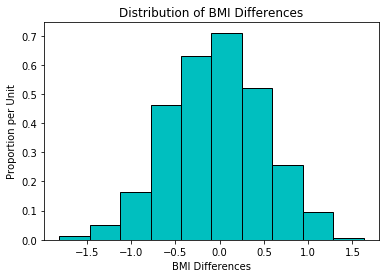

In [151]:
result = plt.hist(BMI_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("BMI Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of BMI Differences")

In [152]:
BMI_p_value = np.count_nonzero(BMI_simulated_stats <= BMI_observed_statistic)/1000
BMI_p_value

0.0

As P-Value is less than 0.05 for BMI, so we will accept the Alternative Hypothesis which states that Diabetics have higher BMI, on average, than Non-Diabetics.

# 7- DiabetesPedigreeFunction and Diabetes:

In [153]:
DPF_observed_statistic = test_statistic(df.loc[:,["DiabetesPedigreeFunction","Outcome"]])
DPF_observed_statistic

-0.12076599999999982

In [154]:
DPF_simulated_stats = create_simulated_stats(df.loc[:,["DiabetesPedigreeFunction","Outcome"]])

Text(0.5, 1.0, 'Distribution of DiabetesPedigreeFunction Differences')

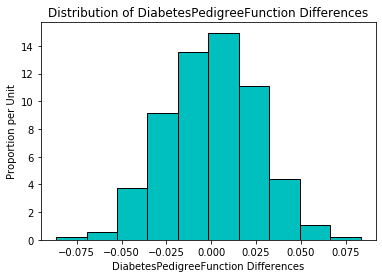

In [155]:
result = plt.hist(DPF_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("DiabetesPedigreeFunction Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of DiabetesPedigreeFunction Differences")

In [156]:
DPF_p_value = np.count_nonzero(DPF_simulated_stats <= DPF_observed_statistic)/1000
DPF_p_value

0.0

As P-Value is less than 0.05 for Diabetes Pedigree Function, so we will accept the Alternative Hypothesis which states that Diabetics have higher value for Diabetes Pedigree Function, on average, than Non-Diabetics.

# 8: Age and Diabetes:

In [157]:
age_observed_statistic = test_statistic(df.loc[:,["Age","Outcome"]])
age_observed_statistic

-5.877164179104479

In [158]:
age_simulated_stats = create_simulated_stats(df.loc[:,["Age","Outcome"]])

Text(0.5, 1.0, 'Distribution of Age Differences')

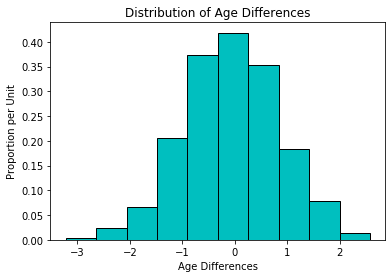

In [159]:
result = plt.hist(age_simulated_stats,density=True,color='c',edgecolor='k')
plt.xlabel("Age Differences")
plt.ylabel("Proportion per Unit")
plt.title("Distribution of Age Differences")

In [160]:
age_p_value = np.count_nonzero(age_simulated_stats <= age_observed_statistic)/1000
age_p_value

0.0

As P-Value is less than 0.05 for Age, so we will accept the Alternative Hypothesis which states that Diabetics have higher ages, on average, than Non-Diabetics.

# To Summarize,

In all these A/B tests that we performed, we got p-values less than 0 which give are statistically significant, favor the Alternative Hypothesis and give evidence that these features have an association with Diabetes. Diabetics are more likely to have higher BMIs, Glucose levels, Insulin levels, values for Diabetes Pedigree function, pregnancies, skin thickness, blood pressure, on average, than non-Diabetics. And, people are more like to develop Diabetes at an older age. 